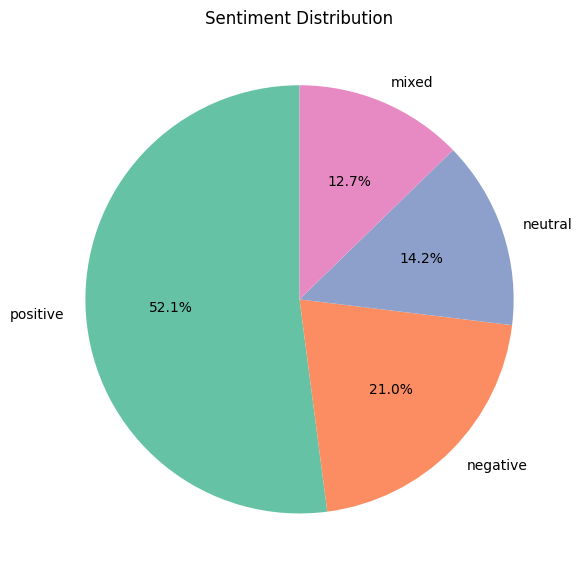


[INFO] Classification Report:
              precision    recall  f1-score   support

       mixed       0.86      0.75      0.80         8
    negative       0.85      0.73      0.79        15
     neutral       0.80      0.44      0.57         9
    positive       0.74      0.89      0.81        36

    accuracy                           0.78        68
   macro avg       0.81      0.70      0.74        68
weighted avg       0.79      0.78      0.77        68


[INFO] Confusion Matrix:
[[ 6  0  0  2]
 [ 0 11  0  4]
 [ 0  0  4  5]
 [ 1  2  1 32]]

[INFO] Sample Predictions:
[positive] I feel so joyful and inspired!
[negative] This was a terrible experience.
[negative] It was okay, I guess.
[mixed] The mix of memories makes me nostalgic.


C:\Users\kingGester\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\kingGester\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

In [2]:
import sys
sys.path.append("../src")

from sentiment_analysis import *

from sklearn.model_selection import train_test_split
import pandas as pd


df = pd.read_csv("../data/sentimentdataset.csv")


df = preprocess_df(df, text_col="Text")
df = simplify_sentiment_labels(df, label_col="Sentiment")


df = df[df["Sentiment"].isin(["positive", "negative", "neutral", "mixed"])]


plot_sentiment_distribution(df["Sentiment"])


X, vectorizer = vectorize_texts(df["Text"])
y = df["Sentiment"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = train_model(X_train, y_train)


evaluate_model(model, X_test, y_test)


sample_texts = [
    "I feel so joyful and inspired!",
    "This was a terrible experience.",
    "It was okay, I guess.",
    "The mix of memories makes me nostalgic."
]
preds = predict_sentiment(model, vectorizer, sample_texts)


print("\n[INFO] Sample Predictions:")
for text, pred in zip(sample_texts, preds):
    print(f"[{pred}] {text}")

In [3]:
model = train_model(X_train, y_train)


evaluate_model(model, X_test, y_test)


[INFO] Classification Report:
              precision    recall  f1-score   support

       mixed       0.86      0.75      0.80         8
    negative       0.85      0.73      0.79        15
     neutral       0.80      0.44      0.57         9
    positive       0.74      0.89      0.81        36

    accuracy                           0.78        68
   macro avg       0.81      0.70      0.74        68
weighted avg       0.79      0.78      0.77        68


[INFO] Confusion Matrix:
[[ 6  0  0  2]
 [ 0 11  0  4]
 [ 0  0  4  5]
 [ 1  2  1 32]]


C:\Users\kingGester\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\kingGester\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

In [22]:
sample_texts = [
    "This is an amazing product!",
    "I hated the experience.",
    " I get out."
]
preds = predict_sentiment(model, vectorizer, sample_texts)
print("\n[INFO] Sample Predictions:")
for text, pred in zip(sample_texts, preds):
    print(f"[{pred}] {text}")



[INFO] Sample Predictions:
[positive] This is an amazing product!
[negative] I hated the experience.
[neutral]  I get out.


In [5]:
from utils import load_dataet
from sentiment_analysis import (
    
    preprocess_df,
    vectorize_texts,
    train_model,
    evaluate_model,
    predict_sentiment,
    plot_sentiment_distribution
)
from sklearn.model_selection import train_test_split


In [6]:
df = load_dataet("../data/sentimentdataset.csv")
df = preprocess_df(df, text_col="Text")
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,enjoying a beautiful day at the park,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,traffic was terrible this morning,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,just finished an amazing workout,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,excited about the upcoming weekend getaway,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,trying out a new recipe for dinner tonight,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


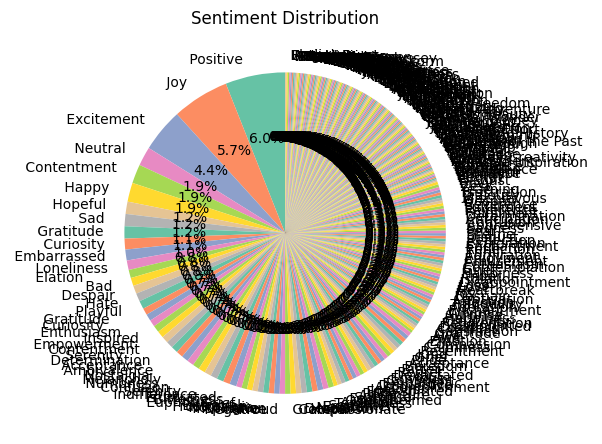

In [7]:
plot_sentiment_distribution(df["Sentiment"])

In [8]:
sample_texts = [
    "This is an amazing product!",
    "I hated the experience.",
    "It was okay, not great but not terrible."
]
preds = predict_sentiment(model, vectorizer, sample_texts)


In [9]:
for text, pred in zip(sample_texts, preds):
    print(f"[{pred}] {text}")

[positive] This is an amazing product!
[negative] I hated the experience.
[negative] It was okay, not great but not terrible.
